# IMPORTS

In [109]:
import pandas as pd
import requests
from arch import arch_model
import QuantLib as ql
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# GET API DATA

In [52]:

def get_stock_data(api_key, ticker):
    # URL for the NASDAQ API endpoint
    endpoint = f'https://data.nasdaq.com/api/v3/datasets/WIKI/{ticker}/data.json'

    # Parameters for the API request
    params = {
        'api_key': "zW3QcpxiDsAdDQT7uFr1",
        'start_date': "2010-01-01",
    }

    try:
        # Sending a GET request to the API endpoint
        response = requests.get(endpoint, params=params)

        # Check if the request was successful (status code 200)
        if response.status_code == 200:
            # Returning the JSON data
            return response.json()
        else:
            # If the request was not successful, print the error status code
            print(f"Error: {response.status_code}")
            return None

    except requests.RequestException as e:
        print(f"Request Exception: {e}")
        return None

# Your actual API key from NASDAQ
api_key = 'zW3QcpxiDsAdDQT7uFr1'

# Call the function to get the stock data
tesla = get_stock_data(api_key, "TSLA")
fb = get_stock_data(api_key, "FB")
apple = get_stock_data(api_key, "AAPL")


In [53]:
#JSON to DATAFRAME
def json_to_dataframe(json_data):
    # Extract necessary data from the JSON structure
    data = json_data['dataset_data']['data']
    columns = json_data['dataset_data']['column_names']
    
    # Create DataFrame
    df = pd.DataFrame(data, columns=columns)
    
    # Convert 'Date' column to datetime type
    df['Date'] = pd.to_datetime(df['Date'])
    
    return df


# Convert JSON data to DataFrame
tesla_df = json_to_dataframe(tesla)
fb_df = json_to_dataframe(fb)
apple_df = json_to_dataframe(apple)

In [54]:
apple_df.head()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
0,2018-03-27,173.68,175.15,166.92,168.340,38962839.0,0.0,1.0,173.68,175.15,166.92,168.340,38962839.0
1,2018-03-26,168.07,173.10,166.44,172.770,36272617.0,0.0,1.0,168.07,173.10,166.44,172.770,36272617.0
2,2018-03-23,168.39,169.92,164.94,164.940,40248954.0,0.0,1.0,168.39,169.92,164.94,164.940,40248954.0
3,2018-03-22,170.00,172.68,168.60,168.845,41051076.0,0.0,1.0,170.00,172.68,168.60,168.845,41051076.0
4,2018-03-21,175.04,175.09,171.26,171.270,35247358.0,0.0,1.0,175.04,175.09,171.26,171.270,35247358.0


# DATA PREPROCESSING

In [55]:
#DATA PREPROCESSING
def preprocess_financial_data(data):
    # Convert the input data into a DataFrame (if it's not already)
    df = pd.DataFrame(data)
    
    # Handle missing values (if any)
    df.fillna(method='ffill', inplace=True)  # Forward fill missing values
    
    # Calculate returns
    df['Returns'] = df['Close'].pct_change() * 100  # Calculate daily returns
    
    # Convert the 'Date' column to datetime format
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Set 'Date' column as index
    # df.set_index('Date', inplace=True) #run only once or you'll get error second time.
    
    return df


# Preprocess the sample data
tesla_df = preprocess_financial_data(tesla_df)
fb_df = preprocess_financial_data(fb_df)
apple_df = preprocess_financial_data(apple_df)

# TESLA

### GARCH(1,1) MODEL

In [43]:
def fit_garch_model(data):
    # Define and fit the GARCH(1,1) model
    data = data.iloc[1:,:]
    model = arch_model(data['Returns'], vol='Garch', p=1, q=1)
    model_fit = model.fit(disp='off')
    return model_fit

# Fit the GARCH(1,1) model to your financial data
garch_model = fit_garch_model(tesla_df)

In [44]:
garch_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -4912.42
Distribution:                  Normal   AIC:                           9832.84
Method:            Maximum Likelihood   BIC:                           9855.13
                                        No. Observations:                 1947
Date:                Mon, Dec 18 2023   Df Residuals:                     1946
Time:                        06:57:38   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu            -0.1079  7.079e-02     -1.524      0.127 [ -0.247,3.085e-02]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          2.4083      1.186      2.030  4.234e-02 [8.323e-02,  4.733]
alpha[1]       0.1826  5.863e-02      3.114  1.844e-03 [6.768e-02,  0.298]
beta[1]        0.5839      0.155      3.771  1.623e-04   [  0.280,  0.887]
==========================================================================

Covariance estimator: robust
"""

### HESTON MODEL

In [ ]:
###############################
##### UNDER CONSTRUCTION ######
###############################

def calculate_heston_volatility(data):
    # Prepare data
    dates = [ql.Date(d.day, d.month, d.year) for d in data['Date'].tolist()]
    returns = data['Returns'].tolist()

    # Set up Heston Model parameters
    spot_price = 100  # 
    risk_free_rate = 0.05  # 
    dividend_yield = 0.0  # 
    initial_variance = 0.1  # 
    mean_reversion_speed = 0.1  # 
    volatility_of_variance = 0.1  # 
    correlation = -0.75  # 

    # Setup Heston Process
    spot_handle = ql.QuoteHandle(ql.SimpleQuote(spot_price))
    flat_ts = ql.YieldTermStructureHandle(ql.FlatForward(dates[0], ql.NullCalendar(), ql.QuoteHandle(ql.SimpleQuote(risk_free_rate))))
    dividend_yield_ts = ql.YieldTermStructureHandle(ql.FlatForward(0, ql.NullCalendar(), ql.QuoteHandle(ql.SimpleQuote(dividend_yield))))
    flat_vol_ts = ql.BlackVolTermStructureHandle(ql.BlackConstantVol(0, ql.NullCalendar(), ql.QuoteHandle(ql.SimpleQuote(0.2)), ql.Actual360()))
    stoch_process = ql.HestonProcess(flat_ts, dividend_yield_ts, spot_handle, initial_variance, mean_reversion_speed, volatility_of_variance, correlation)

    # Setup Heston Model
    model = ql.HestonModel(stoch_process)
    engine = ql.AnalyticHestonEngine(model)
    option = ql.VanillaOption(ql.PlainVanillaPayoff(ql.Option.Call, spot_handle.value()), ql.EuropeanExercise(dates[-1]))

    # Calculate implied volatility using Heston Model
    option.setPricingEngine(engine)
    calculated_volatility = option.impliedVolatility(0.1, engine)  # Replace the 0.1 with your actual option price

    return calculated_volatility

# Calculate Heston volatility for the sample data
heston_volatility = calculate_heston_volatility(tesla_df)

### ML

ML Prep

In [94]:
# Assuming 'sample_data' contains your financial data
# Prepare features and target variable
X = tesla_df[['Open', 'High', 'Low', 'Close', 'Volume']]  # Use relevant columns as features
y = tesla_df['Returns']  # Target variable (returns for volatility prediction)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features #Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Random FOrest

In [ ]:
# There was a wierd Nan in y_Train, had to get rid of it.
# Calculate the mean excluding NaN values
mean_value = np.nanmean(y_train)

# Fill NaN values with mean_value
y_train[nan_indices] = mean_value

In [102]:
# Initialize and train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict on the test set
rf_predictions = rf_model.predict(X_test_scaled)

# Evaluate the model
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
print(f"Random Forest RMSE: {rf_rmse}")

Random Forest RMSE: 3.3376414990563577


SVM

In [104]:

# Initialize and train Support Vector Machine model
svm_model = SVR(kernel='rbf')
svm_model.fit(X_train_scaled, y_train)

# Predict on the test set
svm_predictions = svm_model.predict(X_test_scaled)

# Evaluate the model
svm_rmse = np.sqrt(mean_squared_error(y_test, svm_predictions))
print(f"SVM RMSE: {svm_rmse}")


SVM RMSE: 3.184980503035428


Nueral Net on TS

In [106]:

# Initialize and train Neural Network model
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

nn_model.compile(optimizer='adam', loss='mean_squared_error')
nn_model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=0)

# Predict on the test set
nn_predictions = nn_model.predict(X_test_scaled).flatten()

# Evaluate the model
nn_rmse = np.sqrt(mean_squared_error(y_test, nn_predictions))
print(f"Neural Network RMSE: {nn_rmse}")


13/13 [==============================] - 0s 3ms/step
Neural Network RMSE: 3.209364571674837


SVM Wins !

### VIZ

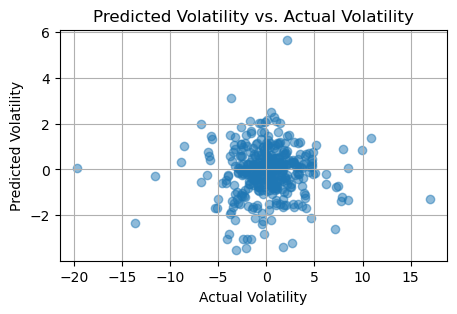

In [112]:
# Predicted VOlatility vs Actual Volatilit
plt.figure(figsize=(5, 3))
plt.scatter(y_test, rf_predictions, alpha=0.5)
plt.title('Predicted Volatility vs. Actual Volatility')
plt.xlabel('Actual Volatility')
plt.ylabel('Predicted Volatility')
plt.grid(True)
plt.show()

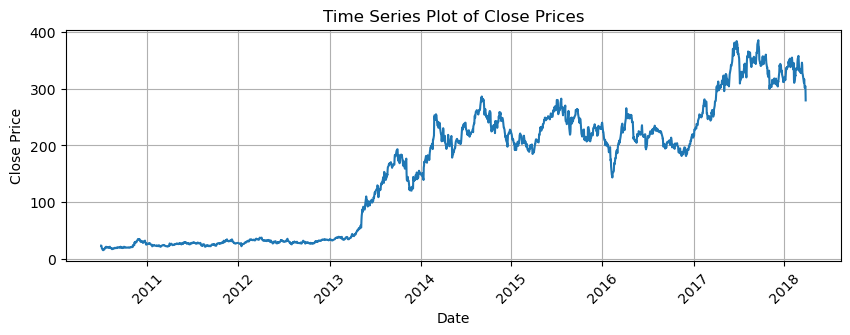

In [114]:
# 1. Time Series Plot of Close Prices
plt.figure(figsize=(10, 3))
plt.plot(tesla_df['Date'], tesla_df['Close'])
plt.title('Time Series Plot of Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

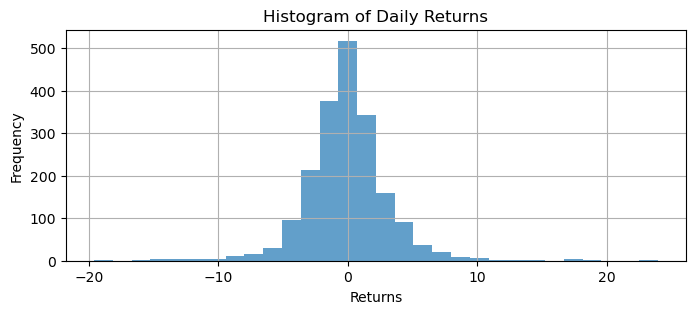

In [116]:
# 2. Histogram of Daily Returns
plt.figure(figsize=(8, 3))
plt.hist(tesla_df['Returns'].dropna(), bins=30, alpha=0.7)
plt.title('Histogram of Daily Returns')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

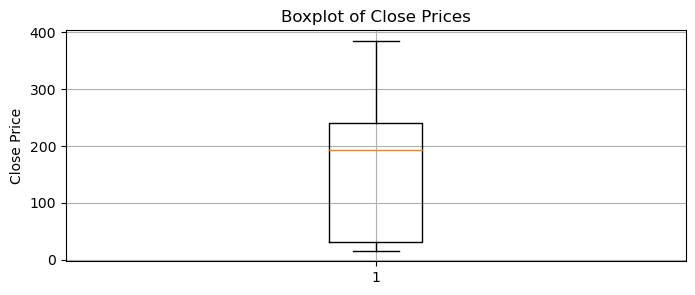

In [117]:
# 3. Boxplot of Close Prices
plt.figure(figsize=(8, 3))
plt.boxplot(tesla_df['Close'])
plt.title('Boxplot of Close Prices')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

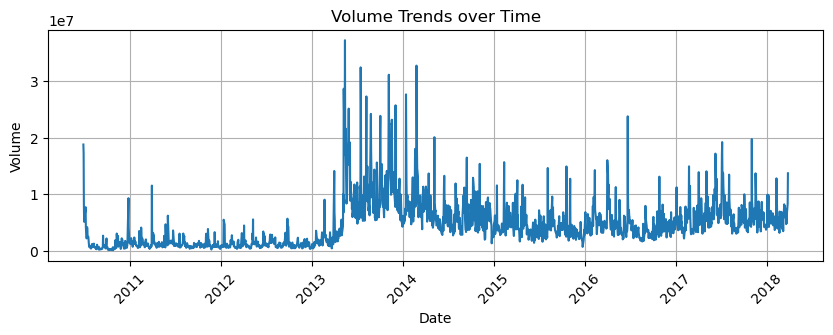

In [118]:
# 4. Volume Trends over Time
plt.figure(figsize=(10, 3))
plt.plot(tesla_df['Date'], tesla_df['Volume'])
plt.title('Volume Trends over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

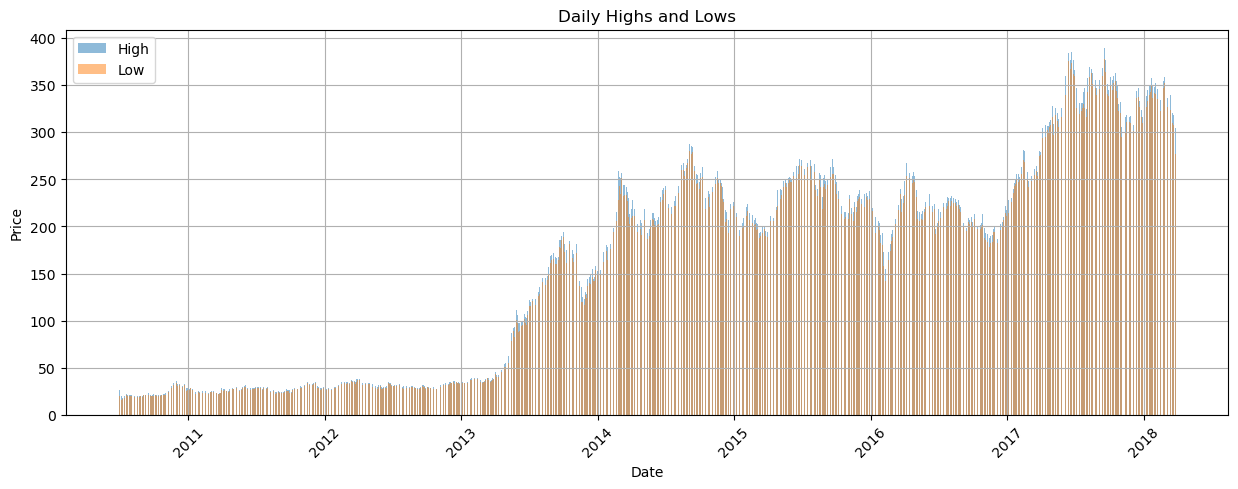

In [120]:
# 5. Bar chart for Daily Highs and Lows
plt.figure(figsize=(15, 5))
plt.bar(tesla_df['Date'], tesla_df['High'], alpha=0.5, label='High')
plt.bar(tesla_df['Date'], tesla_df['Low'], alpha=0.5, label='Low')
plt.title('Daily Highs and Lows')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


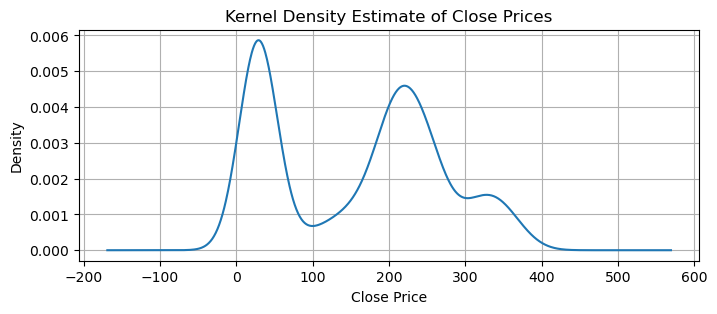

In [122]:
# 6. KDE for Close prices
plt.figure(figsize=(8, 3))
tesla_df['Close'].plot.kde()
plt.title('Kernel Density Estimate of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Density')
plt.grid(True)
plt.show()


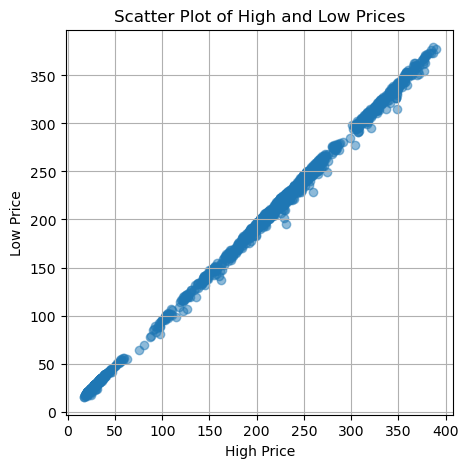

In [126]:
# 7. Scatter plot for High and Low Prices
plt.figure(figsize=(5, 5))
plt.scatter(tesla_df['High'], tesla_df['Low'], alpha=0.5)
plt.title('Scatter Plot of High and Low Prices')
plt.xlabel('High Price')
plt.ylabel('Low Price')
plt.grid(True)
plt.show()

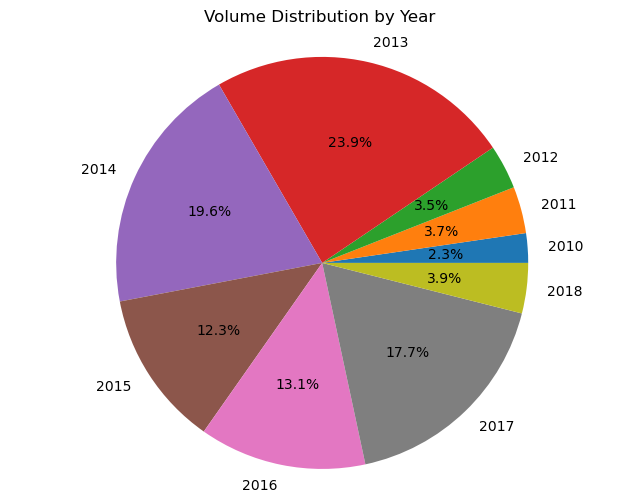

In [129]:
# 8. Pie chart of VOlume by Year
tesla_df['Year'] = pd.to_datetime(tesla_df['Date']).dt.year
volume_by_year = tesla_df.groupby('Year')['Volume'].sum()

plt.figure(figsize=(8, 6))
plt.pie(volume_by_year, labels=volume_by_year.index, autopct='%1.1f%%')
plt.title('Volume Distribution by Year')
plt.axis('equal')
plt.show()